# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Maulana Surya Negara
- **Email:** maulanasuryanegara123@gmail.com
- **ID Dicoding:** mausneg

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perbedaan jumlah peminjaman sepeda antara hari kerja, akhir pekan, dan hari libur?
- Pertanyaan 2 : Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
- Pertanyaan 3 : Bagaimana hubungan antara suhu, kelembapan, dan kecepatan angin dengan jumlah peminjaman sepeda?
- Pertanyaan 4 : Bagaimana perbandingan jumlah peminjaman sepeda antara pengguna terdaftar (registered) dan kasual (casual), serta bagaimana tren penggunaan sepeda oleh kedua jenis pengguna dari tahun 2011 ke 2012?
- Pertanyaan 5 : Pada jam berapa jumlah peminjaman sepeda paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')

Melakukan import dataset Bike Sharing yang terdiri dari data day dan hour ke dalam bentuk dataframe pandas.

### Assessing Data

Melakukan pemeriksaan data untuk melihat apakah ada data yang hilang, duplikat, dan tipe data yang tidak sesuai pada setiap tabel. Jika ada, lakukan penanganan yang sesuai seperti menghapus data duplikat, mengisi data yang hilang, dan mengubah tipe data yang tidak sesuai.

#### Data Day

In [3]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari `info()` kita bisa melihat bahwa tidak ada data yang hilang dan tipe data sudah sesuai. Namun, kita perlu mengubah tipe data `dteday` menjadi datetime agar lebih mudah dalam analisis waktu. Menghapus kolom `instant` karena tidak diperlukan dalam analisis.

In [4]:
print(f'Duplicate data: {df_day.duplicated().sum()}')
df_day.describe()

Duplicate data: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari output di atas terlihat tidak terdapat data yang duplicate. Tetapi pada column `windspeed` value max memiliki nilai yang cukup jauh dari value 75% nya, sehingga kita perlu melakukan pengecekan lebih lanjut pada column tersebut. Kita juga perlu megembalikan nilai `temp`, `atemp`, `hum`, dan `windspeed` ke nilai semula.

#### Data Hour

In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari `info()` kita bisa melihat bahwa tidak ada data yang hilang dan tipe data sudah sesuai. Namun, kita perlu mengubah tipe data `dteday` menjadi datetime agar lebih mudah dalam analisis waktu. Menghapus kolom `instant` karena tidak diperlukan dalam analisis.

In [6]:
print(f'Duplicate data: {df_hour.duplicated().sum()}')
df_hour.describe()

Duplicate data: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari output di atas terlihat tidak terdapat data yang duplicate. Tetapi pada column `windspeed` value max memiliki nilai yang cukup jauh dari value 75% nya, sehingga kita perlu melakukan pengecekan lebih lanjut pada column tersebut. Kita juga perlu megembalikan nilai `temp`, `atemp`, `hum`, dan `windspeed` ke nilai semula.

### Cleaning Data

#### Data Day

Langkah pertama mengubah tipe data `dteday` menjadi datetime agar lebih mudah dalam analisis waktu. Selain itu kita juga akan menghapus column `instant` karena tidak diperlukan dalam analisis ini.

In [7]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [8]:
df_day.drop(columns=['instant'], inplace=True)

In [9]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


Dari `info()` kita bisa melihat bahwa tipe data `dteday` sudah berubah menjadi datetime dan column `instant` sudah dihapus.

Selanjutnya kita akan melakukan pengecekan pada column `windspeed` yang memiliki nilai max yang cukup jauh dari value 75% nya. Kita akan melakukan pengecekan lebih lanjut untuk melihat apakah ada outlier pada column tersebut.

In [10]:
df_day[df_day['windspeed'].max() == df_day['windspeed']].head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635


In [11]:
df_day.sort_values(by='windspeed', ascending=False).head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
432,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382
292,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
420,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732
44,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
382,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
433,2012-03-09,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569
407,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
721,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
666,2012-10-28,4,1,10,0,0,0,2,0.477500,0.467771,0.694583,0.398008,998,3461,4459


Dari output di atas nilai yang besar tersebut adalah nilai yang wajar jika dibandingkan dengan nilai lainnya. Sehingga kita perlu melakukan pengecekan lebih lanjut pada column tersebut dengan menggunakan data `hour`.

Terakhir kita akan mengembalikan nilai `temp`, `atemp`, `hum`, dan `windspeed` ke nilai semula. 

In [12]:
t_min = -8
t_max = 39
at_min = -16
at_max = 50

df_day['temp_original'] = df_day['temp'] * (t_max - t_min) + t_min
df_day['atemp_original'] = df_day['atemp'] * (at_max - at_min) + at_min
df_day['hum_original'] = df_day['hum'] * 100
df_day['windspeed_original'] = df_day['windspeed'] * 67

#### Data Hour

Hal yang sama juga dilakukan pada data hour, kita akan mengubah tipe data `dteday` menjadi datetime agar lebih mudah dalam analisis waktu. Selain itu kita juga akan menghapus column `instant` karena tidak diperlukan dalam analisis ini.

In [13]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [14]:
df_hour.drop(columns=['instant'], inplace=True)


In [15]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

Dari `info()` kita bisa melihat bahwa tipe data `dteday` sudah berubah menjadi datetime dan column `instant` sudah dihapus.

Selanjutnya kita akan melakukan pengecekan pada column `windspeed` yang memiliki nilai max yang cukup jauh dari value 75% nya. Kita akan melakukan pengecekan lebih lanjut untuk melihat apakah ada outlier pada column tersebut.

In [16]:
df_hour[df_hour['windspeed'].max() == df_hour['windspeed']]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4315,2011-07-03,3,0,7,17,0,0,0,3,0.8,0.7424,0.49,0.8507,181,177,358
4316,2011-07-03,3,0,7,18,0,0,0,3,0.8,0.7424,0.49,0.8507,74,107,181


In [17]:
df_hour.sort_values(by='windspeed', ascending=False).head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4316,2011-07-03,3,0,7,18,0,0,0,3,0.80,0.7424,0.49,0.8507,74,107,181
4315,2011-07-03,3,0,7,17,0,0,0,3,0.80,0.7424,0.49,0.8507,181,177,358
5635,2011-08-27,3,0,8,17,0,6,0,3,0.64,0.5758,0.89,0.8358,2,14,16
1259,2011-02-25,1,0,2,15,0,5,1,1,0.46,0.4545,0.41,0.8060,5,50,55
9956,2012-02-24,1,1,2,21,0,5,1,1,0.42,0.4242,0.35,0.8060,1,151,152
1017,2011-02-15,1,0,2,1,0,2,1,1,0.30,0.2424,0.42,0.7761,0,5,5
1261,2011-02-25,1,0,2,17,0,5,1,1,0.32,0.2727,0.49,0.7463,8,181,189
1125,2011-02-19,1,0,2,15,0,6,0,1,0.44,0.4394,0.16,0.7463,84,87,171
9653,2012-02-12,1,1,2,4,0,0,0,2,0.10,0.0455,0.46,0.7164,0,1,1
11024,2012-04-09,2,1,4,12,0,1,1,1,0.54,0.5152,0.28,0.7164,94,186,280


Dari output di atas ternyata banyak data juga yang memiliki nilai `windspeed` terbilang tinggi, sehingga hal ini bukanlah suatu anomali jadi kita tidak perlu melakukan penanganan lebih lanjut pada column tersebut.

Terakhir kita akan mengembalikan nilai `temp`, `atemp`, `hum`, dan `windspeed` ke nilai semula.

In [18]:
df_hour['temp_original'] = df_hour['temp'] * (t_max - t_min) + t_min
df_hour['atemp_original'] = df_hour['atemp'] * (at_max - at_min) + at_min
df_hour['hum_original'] = df_hour['hum'] * 100
df_hour['windspeed_original'] = df_hour['windspeed'] * 67

## Exploratory Data Analysis (EDA)

### Day Type

Langkah pertama adalah melakukan pengelompokan data berdasarkan `workingday`, `holiday`, dan `weekday`. Kemudian kita akan menghitung jumlah peminjaman sepeda untuk masing-masing kelompok tersebut.

In [19]:
df_working_holiday = df_day.groupby(['workingday', 'holiday']).agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'    
}).reset_index()
df_working_holiday

,workingday,holiday,cnt,casual,registered
0,0,0,921834,294373,627461
1,0,1,78435,22359,56076
2,1,0,2292410,303285,1989125


Selanjutnya kita akan melakukan labeling pada column `workingday` dan `holiday` agar lebih mudah dalam analisis.

In [20]:
df_working_holiday['day_type'] = df_working_holiday.apply(
    lambda row: 'weekend' if row['workingday'] == 0 and row['holiday'] == 0 else 
                'holiday' if row['holiday'] == 1 else 
                'working', axis=1
)
df_working_holiday.drop(columns=['workingday', 'holiday'], inplace=True)
df_working_holiday

,cnt,casual,registered,day_type
0,921834,294373,627461,weekend
1,78435,22359,56076,holiday
2,2292410,303285,1989125,working


Dari output di atas bisa kita lihat jumlah peminjaman sepeda pada hari kerja, akhir pekan, dan hari libur sudah dikelompokkan.

### Weather

Selanjutnya kita akan melakukan pengelompokan data berdasarkan `weather` dan menghitung jumlah peminjaman sepeda untuk masing-masing kelompok tersebut. Dikarenakan pada satu hari bisa terjadi lebih dari satu cuaca, maka kita akan menggunakan data `hour` untuk melakukan pengelompokan ini.

In [21]:
df_weather = df_hour.groupby(['weathersit']).agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'    
}).reset_index()
df_weather

,weathersit,cnt,casual,registered
0,1,2338173,462745,1875428
1,2,795952,134481,661471
2,3,158331,22783,135548
3,4,223,8,215


Lalu kita akan melakukan labeling pada column `weather` agar lebih mudah dalam analisis.

In [22]:
df_weather['weather'] = df_weather.apply(
    lambda row: 'clear_cloudy' if row['weathersit'] == 1 else 
                'mist_cloudy' if row['weathersit'] == 2 else 
                'light_rain_snow' if row['weathersit'] == 3 else 
                'heavy_rain_snow_fog', axis=1
)
df_weather.drop(columns=['weathersit'], inplace=True)
df_weather

,cnt,casual,registered,weather
0,2338173,462745,1875428,clear_cloudy
1,795952,134481,661471,mist_cloudy
2,158331,22783,135548,light_rain_snow
3,223,8,215,heavy_rain_snow_fog


Dari output di atas bisa kita lihat jumlah peminjaman sepeda pada masing-masing cuaca sudah dikelompokkan.

### Yearly

In [23]:
df_year = df_day.groupby(['yr']).agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'    
}).reset_index()
df_year

,yr,cnt,casual,registered
0,0,1243103,247252,995851
1,1,2049576,372765,1676811


### Hour Distribution

Selanjutnya kita akan melakukan menghitung jumlah peminjaman sepeda berdasarkan jam. Kita akan menggunakan data `hour` untuk melakukan pengelompokan ini. Agar terfokus pada jam saja kita hanya akan menggunakan kolom `hr` dan `cnt` saja

In [24]:
df_hour_type = df_hour.groupby(['hr']).agg({
    'cnt': 'sum'
}).reset_index()
df_hour_type

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


Dari output di atas sudah terlihat bagaimana distribusi peminjaman sepeda berdasarkan jam. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan jumlah peminjaman sepeda antara hari kerja, akhir pekan, dan hari libur?

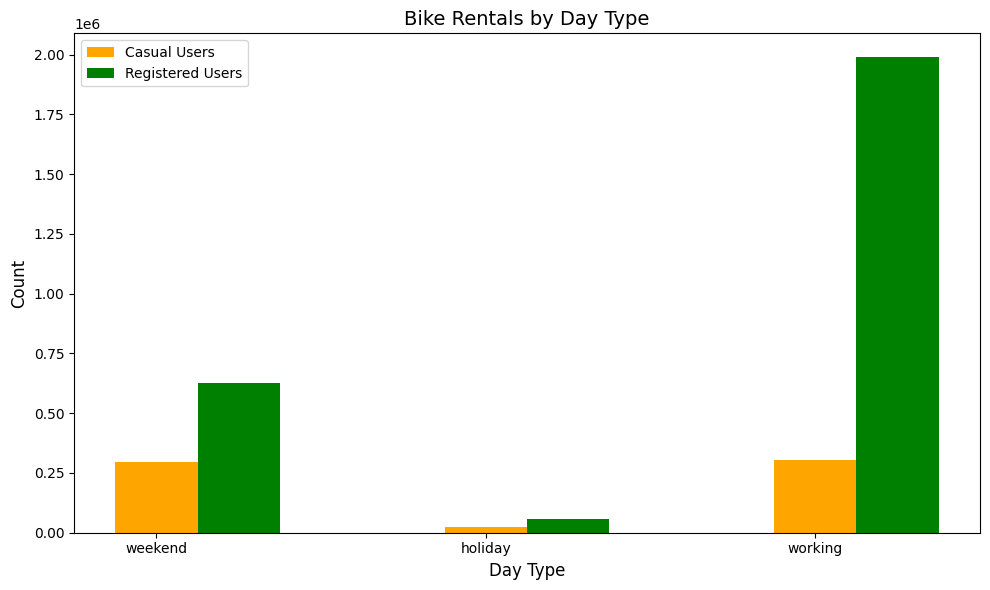

In [25]:
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = range(len(df_working_holiday['day_type']))

plt.bar([p + bar_width for p in x], df_working_holiday['casual'], width=bar_width, label='Casual Users', color='orange')
plt.bar([p + bar_width * 2 for p in x], df_working_holiday['registered'], width=bar_width, label='Registered Users', color='green')

plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bike Rentals by Day Type', fontsize=14)
plt.xticks([p + bar_width for p in x], df_working_holiday['day_type'])
plt.legend()

plt.tight_layout()
plt.show()

Dari visualisasi di atas, jika dilihat dari status user, `registered users` jauh lebih banyak meminjam sepeda pada `working day` dibandingkan dengan `weekend` dan `holiday`. Hal ini menunjukkan bahwa `registered users` lebih banyak berisi perkerja atau pelajar yang menggunakan sepeda untuk berangkat kerja atau sekolah. Karena mereka rutin menggunakan sepeda untuk berangkat kerja atau sekolah, mereka memutuskan untuk menjadi `registered users` yang bisa jadi lebih memiliki banyak keuntungan dibandingkan dengan `casual users`. 

Sedangkan untuk `casual users` selisihnya tidak terlalu jauh antara `working day` dan `weekend`. Hal ini menunjukkan bahwa `casual users` berisi orang-orang yang menggunakan sepeda untuk bersantai, berlibur, atau berolahraga yang dimana mereka hanya menggunakan sepeda sekali-kali saja.

Sedangkan untuk `holiday`, baik `registered users` maupun `casual users` memiliki jumlah peminjaman yang sedikit. Hal ini menunjukkan bahwa pada saat hari libur, orang-orang lebih memilih untuk berlibur atau bersantai dirumah dibandingkan dengan menggunakan sepeda.

### Pertanyaan 2 : Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?

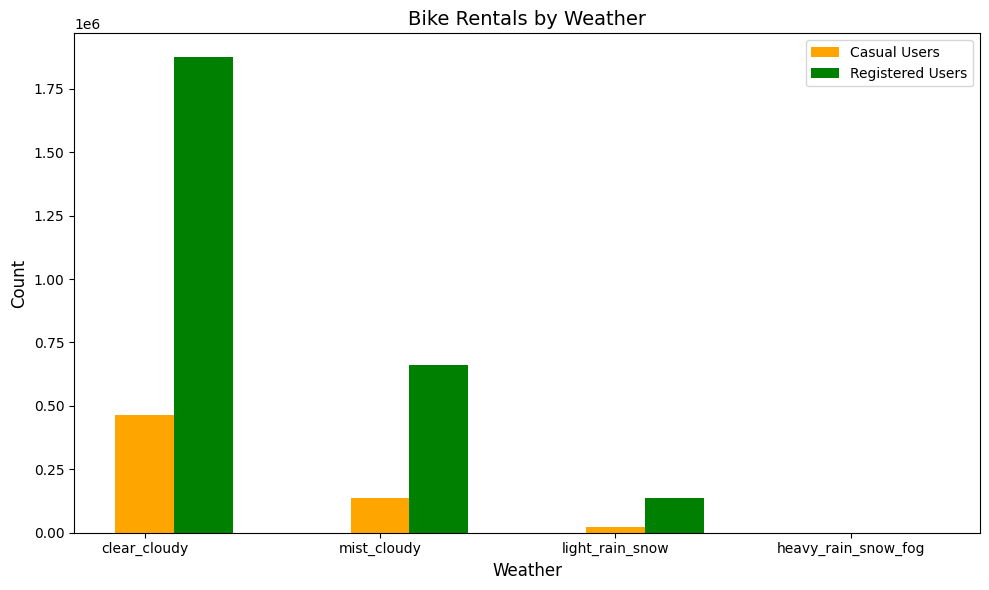

In [26]:
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = range(len(df_weather['weather']))

plt.bar([p + bar_width for p in x], df_weather['casual'], width=bar_width, label='Casual Users', color='orange')
plt.bar([p + bar_width * 2 for p in x], df_weather['registered'], width=bar_width, label='Registered Users', color='green')

plt.xlabel('Weather', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bike Rentals by Weather', fontsize=14)
plt.xticks([p + bar_width for p in x], df_weather['weather'])
plt.legend()

plt.tight_layout()
plt.show()

Jika dianalisis dari segi `Weather`, jumlah peminjaman sepeda berbanding lurus dengan cuaca. Pada saat cuaca cerah, jumlah peminjaman sepeda sangat tinggi. Begitu sebaliknya pada saat cuaca buruk, jumlah peminjaman sepeda hampir tidak ada. Hal ini menunjukkan bahwa cuaca sangat berpengaruh terhadap jumlah peminjaman sepeda.

### Pertanyaan 3 : Bagaimana hubungan antara suhu, kelembapan, dan kecepatan angin dengan jumlah peminjaman sepeda?

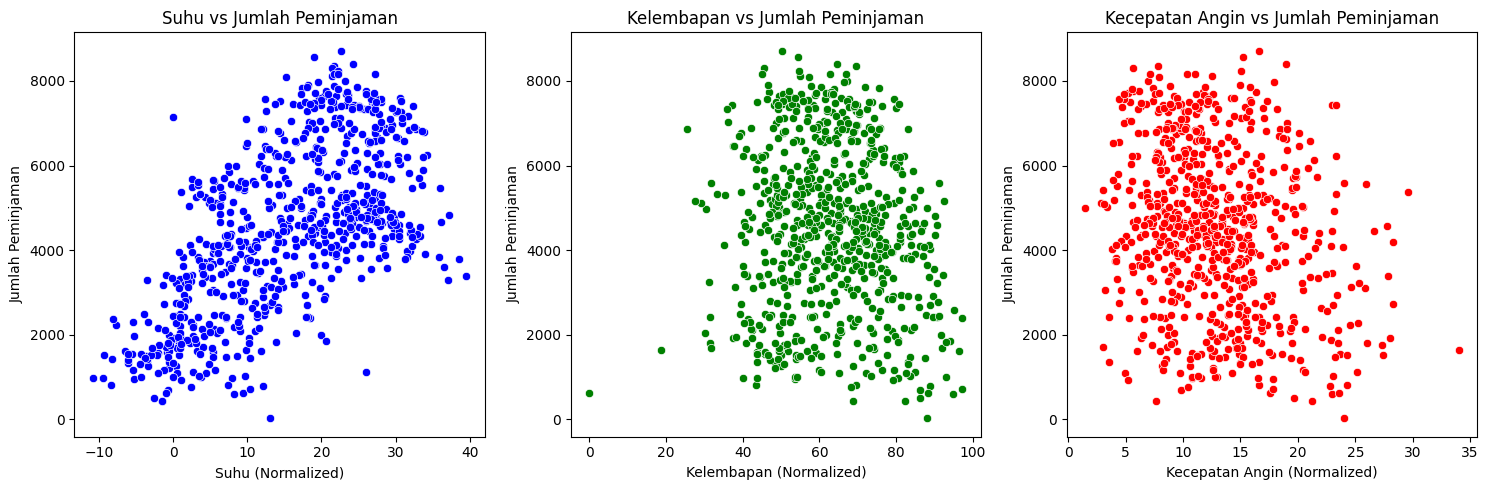

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='atemp_original', y='cnt', data=df_day, color='blue')
plt.title('Suhu vs Jumlah Peminjaman')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Peminjaman')

plt.subplot(1, 3, 2)
sns.scatterplot(x='hum_original', y='cnt', data=df_day, color='green')
plt.title('Kelembapan vs Jumlah Peminjaman')
plt.xlabel('Kelembapan (Normalized)')
plt.ylabel('Jumlah Peminjaman')

plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed_original', y='cnt', data=df_day, color='red')
plt.title('Kecepatan Angin vs Jumlah Peminjaman')
plt.xlabel('Kecepatan Angin (Normalized)')
plt.ylabel('Jumlah Peminjaman')

plt.tight_layout()
plt.show()

Dari visualisasi di atas, hanya `temp` yang memiliki hubungan yang signifikan dengan jumlah peminjaman sepeda. Hal ini menunjukkan bahwa semakin tinggi suhu, semakin banyak orang yang meminjam sepeda. Kita dapat melakukan analisis lebih lanjut dengan menghitung correlasi antara `atemp`, `hum`, `windspeed`, dan `cnt` untuk melihat hubungan antara ketiga variabel tersebut.

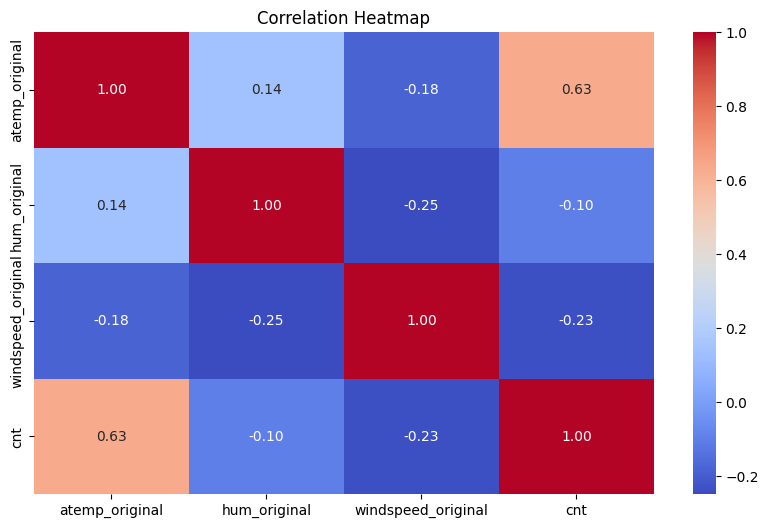

In [28]:
correlation = df_day[['atemp_original', 'hum_original', 'windspeed_original', 'cnt']].corr()   
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Dari visualisasi di atas, kita bisa melihat bahwa `temp` memiliki hubungan yang sangat kuat dengan jumlah peminjaman sepeda. Sedangkan untuk `hum` dan `windspeed` tidak memiliki hubungan yang signifikan dengan jumlah peminjaman sepeda. Hal ini menunjukkan bahwa suhu adalah faktor yang paling berpengaruh terhadap jumlah peminjaman sepeda.

### Pertanyaan 4 : Bagaimana perbandingan jumlah peminjaman sepeda antara pengguna terdaftar (registered) dan kasual (casual), serta bagaimana tren penggunaan sepeda oleh kedua jenis pengguna dari tahun 2011 ke 2012?

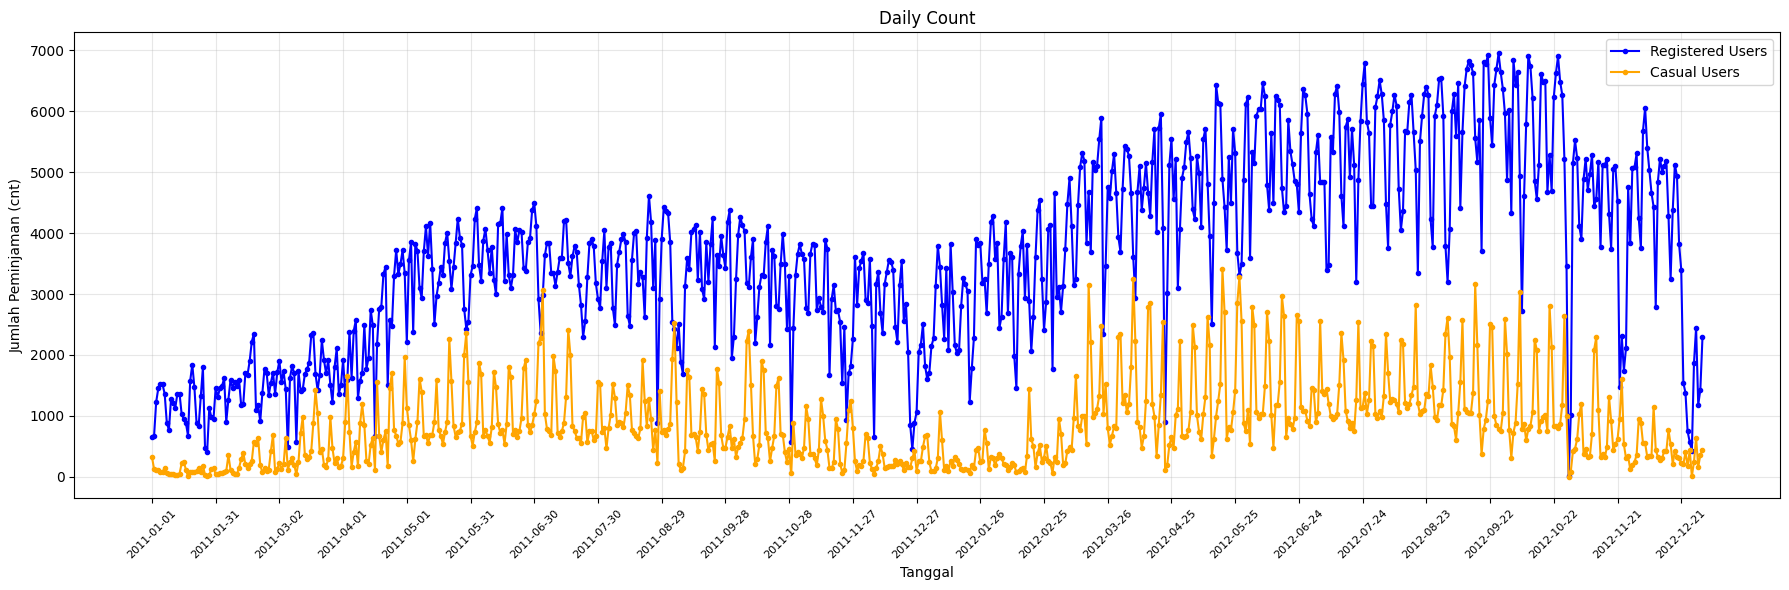

In [29]:
plt.figure(figsize=(18, 6))
plt.plot(df_day['dteday'], df_day['registered'], marker='o', linestyle='-', color='blue', label='Registered Users', markersize=3)
plt.plot(df_day['dteday'], df_day['casual'], marker='o', linestyle='-', color='orange', label='Casual Users', markersize=3)

plt.xlabel('Tanggal', fontsize=10)
plt.ylabel('Jumlah Peminjaman (cnt)', fontsize=10)
plt.title('Daily Count', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(df_day['dteday'][::30], rotation=45, fontsize=8)
plt.legend()

plt.tight_layout()
plt.show()

Dari visualisasi di atas menunjukan `registered users` secara konsisten memiliki jumlah peminjaman yang jauh lebih tinggi dibandingkan `casual users`. Hal ini menunjukkan bahwa `registered users` cenderung menggunakan sepeda untuk aktivitas rutin, seperti pergi ke kantor atau sekolah. Jumlah peminjaman sepeda oleh kedua jenis users meningkat secara signifikan dari tahun 2011 ke 2012. Peningkatan ini dapat disebabkan oleh meningkatnya popularitas layanan berbagi sepeda atau perbaikan infrastruktur sepeda. Jumlah peminjaman sepeda oleh kedua jenis users selalu menurun pada bulan Desember. Penurunan ini kemungkinan besar disebabkan oleh kondisi cuaca yang buruk, seperti hujan atau salju, yang membuat orang enggan menggunakan sepeda.

### Pertanyaan 5 : Pada jam berapa jumlah peminjaman sepeda paling tinggi?

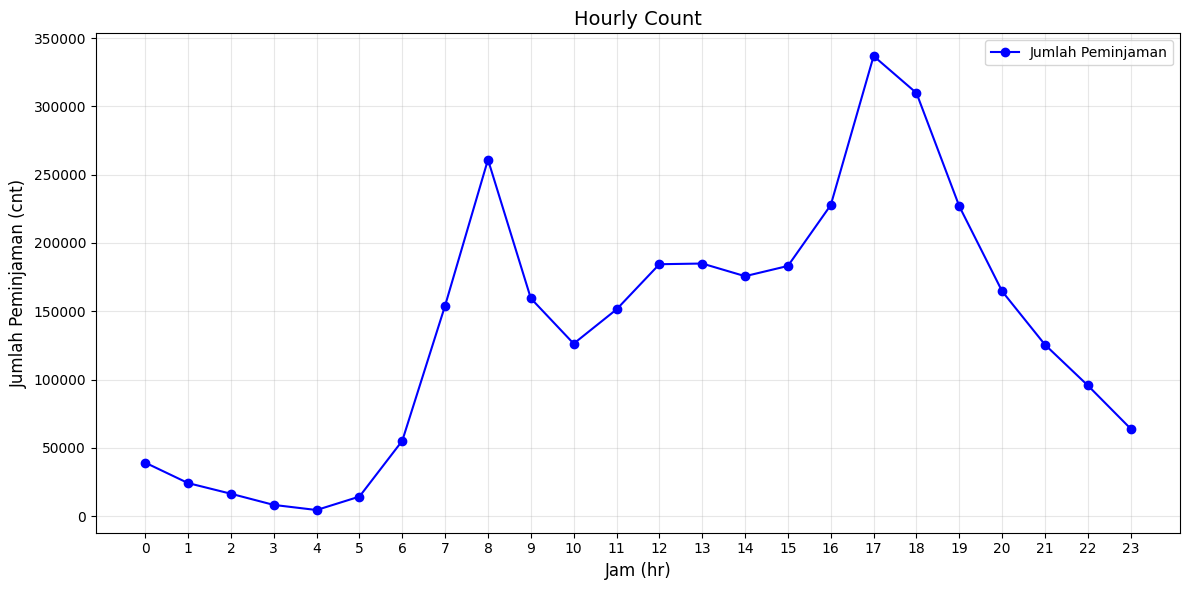

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df_hour_type['hr'], df_hour_type['cnt'], marker='o', linestyle='-', color='blue', label='Jumlah Peminjaman')

plt.xlabel('Jam (hr)', fontsize=12)
plt.ylabel('Jumlah Peminjaman (cnt)', fontsize=12)
plt.title('Hourly Count', fontsize=14)
plt.xticks(df_hour_type['hr'])
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

Dari output di atas kita bisa melihat bahwa jumlah peminjaman sepeda paling tinggi pada jam 17:00 dan 18:00. Hal ini menunjukkan bahwa orang-orang lebih banyak menggunakan sepeda pada saat pulang kerja atau sekolah. Sedangkan pada jam 07:00 - 09.00 juga terlihat cukup tinggi, hal ini menunjukkan bahwa orang-orang juga menggunakan sepeda untuk berangkat kerja atau sekolah.

## Analisis Lanjutan

### Clustering

Selanjutnya kita akan melakukan clustering manual pada data `hour` untuk melihat pola peminjaman sepeda berdasarkan waktu peminjaman. Kita akan menggunakan data `hour` dan `cnt` untuk melakukan clustering ini. Kita akan hanya memakai metode binning untuk melakukan clustering ini. Kita akan membagi waktu peminjaman menjadi 4 kelompok, yaitu `Dini Hari`, `Pagi`, `Siang`, `Sore`, dan `Malam`. 

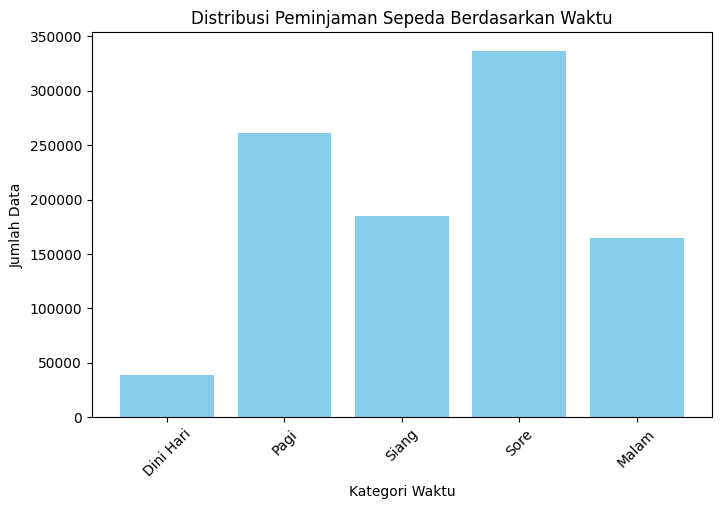

In [31]:
bins = [0, 5, 11, 15, 20, 24]
labels = ['Dini Hari', 'Pagi', 'Siang', 'Sore', 'Malam']
df_hour_type['time_bin'] = pd.cut(df_hour_type['hr'], bins=bins, labels=labels, right=False, ordered=False)

plt.figure(figsize=(8, 5))
plt.bar(df_hour_type['time_bin'], df_hour_type['cnt'], color='skyblue')
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Waktu')
plt.xlabel('Kategori Waktu')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Data')
plt.show()

Dari visualisasi di atas terlihat bahwa peminjaman sepeda paling tinggi pada jam pagi dan sore. Hal ini menunjukan bahwa orang-orang lebih banyak menggunakan sepeda pada saat berangkat kerja atau sekolah dan pulang kerja atau sekolah. Sedangkan pada jam malam dan dini hari jumlah peminjaman sepeda sangat sedikit. Hal ini menunjukkan bahwa orang-orang lebih memilih untuk beristirahat dirumah pada jam-jam tersebut.

## Conclusion

Berdasarkan analisis data yang telah dilakukan terhadap dataset Bike Sharing, berikut adalah temuan-temuan spesifik yang dapat disampaikan:

- Jumlah peminjaman sepeda tertinggi terjadi pada hari kerja (working day), terutama oleh `registered users` dengan total peminjaman mencapai lebih dari 2 juta kali. Sebaliknya, pada hari libur (holiday), jumlah peminjaman jauh lebih rendah, baik untuk `registered users` maupun `casual users`. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai alat transportasi rutin untuk bekerja atau sekolah, dibandingkan untuk rekreasi.

- Cuaca cerah atau berawan ringan (clear_cloudy) memiliki jumlah peminjaman tertinggi, dengan total lebih dari 2 juta kali. Sebaliknya, cuaca buruk seperti hujan deras atau kabut tebal (heavy_rain_snow_fog) memiliki jumlah peminjaman yang sangat rendah, kurang dari 250 kali. Ini menunjukkan bahwa kondisi cuaca sangat memengaruhi keputusan pengguna untuk meminjam sepeda, di mana cuaca buruk menjadi penghalang utama.

- Suhu (temp) memiliki korelasi positif yang signifikan dengan jumlah peminjaman sepeda, dengan nilai korelasi sekitar 0.63. Jumlah peminjaman meningkat seiring dengan kenaikan suhu, dengan puncaknya pada suhu sekitar 30°C–40°C. Sebaliknya, kelembapan (humidity) dan kecepatan angin (windspeed) tidak menunjukkan hubungan yang signifikan terhadap jumlah peminjaman. Hal ini menunjukkan bahwa pengguna lebih toleran terhadap kelembapan dan angin dibandingkan suhu.

- Pengguna terdaftar `registered users` secara konsisten memiliki jumlah peminjaman yang jauh lebih tinggi dibandingkan pengguna kasual. Pada tahun 2012, jumlah peminjaman oleh pengguna terdaftar sekitar 2 juta kali, sedangkan pengguna kasual hanya sekitar 1 juta kali. Tren peminjaman meningkat dari tahun 2011 ke 2012, menunjukkan peningkatan popularitas layanan berbagi sepeda. Namun, terjadi penurunan signifikan pada bulan Desember, kemungkinan besar disebabkan oleh cuaca buruk.

- Peminjaman sepeda paling tinggi terjadi pada pukul 17:00–18:00, dengan jumlah peminjaman mencapai lebih dari 300 ribu kali. Ini menunjukkan bahwa sepeda banyak digunakan untuk pulang kerja atau sekolah. Peminjaman juga cukup tinggi pada pukul 07:00–09:00, menunjukkan penggunaan sepeda untuk berangkat kerja atau sekolah.Sebaliknya, peminjaman sangat rendah pada dini hari (pukul 00:00–05:00), menunjukkan bahwa sepeda jarang digunakan pada waktu tersebut.

Berdasarkan temuan di atas, berikut adalah beberapa saran yang dapat diberikan:

- Optimalisasi Layanan pada Jam Sibuk: Mengalokasikan lebih banyak sepeda pada pukul 07:00–09:00 dan 17:00–18:00 untuk memenuhi permintaan yang tinggi. Menyediakan stasiun sepeda tambahan di area perkantoran dan sekolah untuk mendukung kebutuhan pengguna pada jam sibuk.

- Promosi pada Akhir Pekan dan Hari Libur: Mengadakan program promosi atau diskon untuk `casual users` pada akhir pekan dan hari libur untuk meningkatkan jumlah peminjaman. Menyediakan rute sepeda yang menarik untuk rekreasi, seperti jalur sepeda di taman atau area wisata.

- Penyesuaian Layanan Berdasarkan Cuaca: Menyediakan perlengkapan tambahan seperti jas hujan atau pelindung sepeda untuk mendorong penggunaan sepeda pada cuaca mendung atau hujan ringan. Memberikan notifikasi cuaca kepada pengguna melalui aplikasi untuk membantu mereka merencanakan perjalanan.

- Peningkatan Infrastruktur Sepeda: Meningkatkan infrastruktur sepeda, seperti jalur sepeda yang aman dan tempat parkir sepeda, terutama di area dengan jumlah pengguna terdaftar yang tinggi. Memperluas layanan berbagi sepeda ke area baru untuk menjangkau lebih banyak pengguna potensial.

- Analisis Lanjutan: Melakukan analisis lebih mendalam terhadap faktor-faktor lain yang mungkin memengaruhi jumlah peminjaman, seperti lokasi geografis, harga layanan, atau tingkat kepadatan penduduk Menggunakan model prediktif timeseries untuk memperkirakan permintaan sepeda di masa depan berdasarkan tren historis dan faktor lingkungan.

In [32]:
df_all = pd.merge(df_day, df_hour, on='dteday', how='inner', suffixes=('_day', '_hour'))
df_all.to_csv('dashboard/all.csv', index=False)